# Beta Pic c orbits using bundle from Wang

In that case, here is the orbitize output file for GRAVITY + imaging + RVs from the Vandal paper.




In [1]:
#!pip install numpy cython --upgrade
#!pip install orbitize
#!pip install numpy

In [47]:
import numpy as np
import orbitize
from orbitize import results
from astropy import constants as c
from astropy import units as u
from kepler3 import *
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

figsize_a4 = (8.3, 11.7) #a4
figsize_square_a4 = (8.3, 8.3)
figsize_half_a4 = (8.3 , 8.3/1.618)
figsize_2_1_a4 = (8.3, 8.3/2)

In [3]:
filename="Data/withc_gravity_vandalrv_11eps.hdf5"

In [4]:
res = results.Results()
res.load_results(filename)
chain = res.post #posterior output from orbit-fitting process (orbits, varying parameters)
tau_ref_epoch = res.tau_ref_epoch #tau is periastron, closest to star

#res.print_results()

/net/vdesk/data2/vbakker/Thesis1-jupyter/lib64/python3.9/site-packages/orbitize/basis.py:71: UserWarning: "
                Radial velocity data found in input data, but rv parameters will 
                not be sampled. To sample rv parameters, set 'fit_secondary_mass' 
                to True.
                
  warnings.warn(


In [5]:
sample_number = 10

mjds_requested = np.linspace(57800,59500,1000)
mjds_requested = np.linspace(57700,59500,1100)

# create a new system class from the results. Set some things as dummy variables = 1
sys = orbitize.system.System(2, res.data, 1, 1, mass_err=1, plx_err=1, fit_secondary_mass=True, tau_ref_epoch=res.tau_ref_epoch)

ra, dec, rv = sys.compute_all_orbits(res.post[4], mjds_requested)


Text(0, 0.5, 'Beta Pic c separation [mas]')

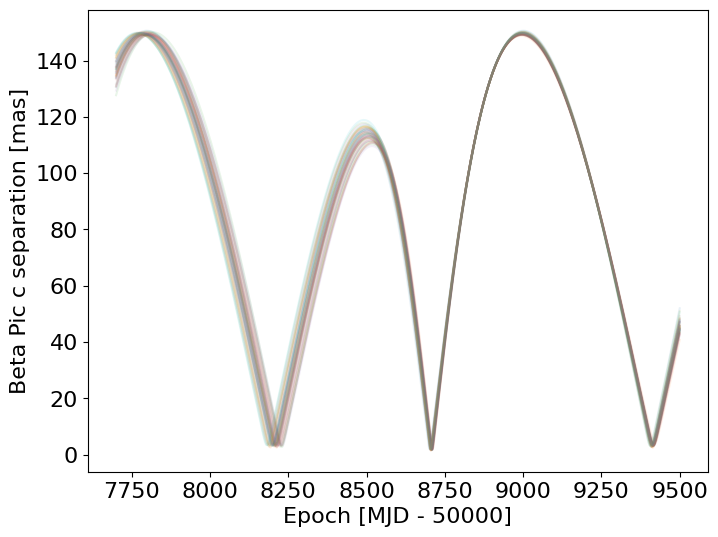

In [6]:

#%matplotlib widget
fig, ax = plt.subplots(1,1,figsize=(8,6))

for i in np.arange(50):
    ra, dec, rv = sys.compute_all_orbits(res.post[i], mjds_requested)
    r = np.sqrt(ra*ra+dec*dec)
#    plt.plot(ra[:,:,0],dec[:,:,0],alpha=0.1)
    ax.plot(mjds_requested-50000,r[:,2,0],alpha=0.1)

ax.set_xlabel('Epoch [MJD - 50000]')
ax.set_ylabel('Beta Pic c separation [mas]')


In [7]:
#calculate Hill radius pic c
M = 1.75 * u.Msun
Mc = 8.5 * u.Mjup
ac = 2.68 * u.au
ec = 0.208
r_hill_mas = 1000 * (rhill(M, Mc, ac)*(1-ec)).value / 19.44
print("r_hill is {:.1f} mas".format(r_hill_mas))

r_hill is 12.6 mas


In [8]:
#add beta pic b

Mb = 9.00 * u.Mjup
ab = 9.00 * u.au
eb = 0.10

r_hill_b_mas = 1000 * (rhill(M, Mb, ab)*(1-eb)).value / 19.44
print("r_hill b is {:.1f} mas".format(r_hill_b_mas))



r_hill b is 49.0 mas


r_hill b is 49.0 mas


/var/tmp/vbakker/ipykernel_3094833/3200336948.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc = 'upper left')


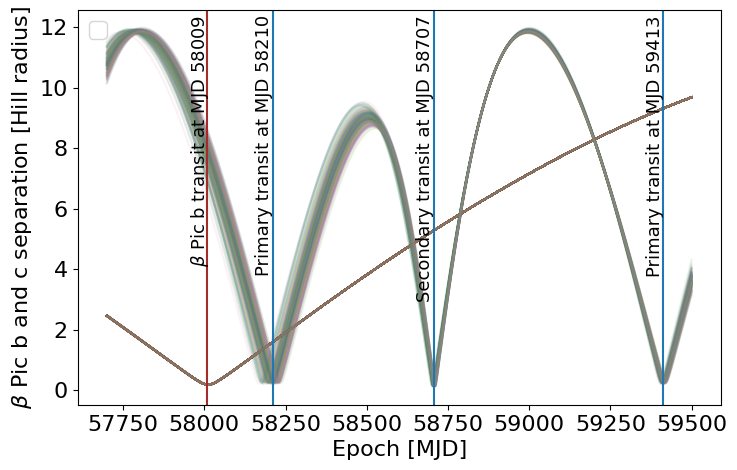

(600, 3)
     n          mjds     min_r
0    0  58204.458599  0.285950
1    1  58704.003640  0.165719
2    2  59409.918107  0.287163
3    0  58192.993631  0.197534
4    1  58705.641492  0.111085
..  ..           ...       ...
595  1  58708.917197  0.135200
596  2  59414.831665  0.252821
597  0  58220.837125  0.259873
598  1  58705.641492  0.148407
599  2  59409.918107  0.261155

[600 rows x 3 columns]


In [72]:
#Create data frame with epoch, mjd of minimum separation and the hill radius

P = 1121
P_err = 15
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots(1,1,figsize=figsize_half_a4)
print("r_hill b is {:.1f} mas".format(r_hill_b_mas))

epoch_min = [[200,500,900], #ranges of minimum to look into
             [400,700,1100]]
df = pd.DataFrame() #store index, minimum hill radius and its date

for i in np.arange(200):
    ra, dec, rv = sys.compute_all_orbits(res.post[i], mjds_requested)
    r = np.sqrt(ra*ra+dec*dec)
    ax.plot(mjds_requested,r[:,2,0]/r_hill_mas,alpha=0.1) #, label = r'\Beta Pic c')
    
    for x in np.arange(3):
        #store index, minimum hill radius and its date
        min_radius = np.min(r[:,2,0][epoch_min[0][x]:epoch_min[1][x]]/r_hill_mas)
        min_mjds = mjds_requested[np.where(r[:,2,0]/r_hill_mas == min_radius)][0]
        df_new_row =pd.DataFrame({"n":[x],"mjds":[min_mjds],"min_r":[min_radius]}) 
        df = pd.concat([df, df_new_row], ignore_index=True)
    ax.plot(mjds_requested,r[:,1,0]/r_hill_b_mas,alpha=0.1) #, label = r'Pic b')

#use the mode of minimum separation
ax.axvline(58210) 
ax.axvline(58707) 
ax.axvline(59413)
ax.axvline(58009, color = 'brown')
ax.legend(loc = 'upper left')
ax.set_xlabel('Epoch [MJD]')
ax.set_ylabel(r'$\beta$ Pic b and c separation [Hill radius]')
ax.text(58210-55, 12.4, 'Primary transit at MJD 58210', rotation=90, va='top', fontsize=13)
ax.text(58707-55, 12.4, 'Secondary transit at MJD 58707', rotation=90, va='top', fontsize=13)
ax.text(59413-55, 12.4, 'Primary transit at MJD 59413', rotation=90, va='top', fontsize=13)
ax.text(58009-55, 12.4,  r'$\beta$ Pic b transit at MJD 58009', rotation=90, va='top', fontsize=13)
plt.savefig(f'Figures/orbital_bundels/orbitize_b_c.pdf')
plt.show()

print(df.shape)
print(df)

The median transits
For epoch 0 we get 58209.00 +28.22 -42.21 days
For epoch 1 we get 58707.00 +5.19 -7.91 days
For epoch 2 we get 59413.00 +10.02 -11.27 days


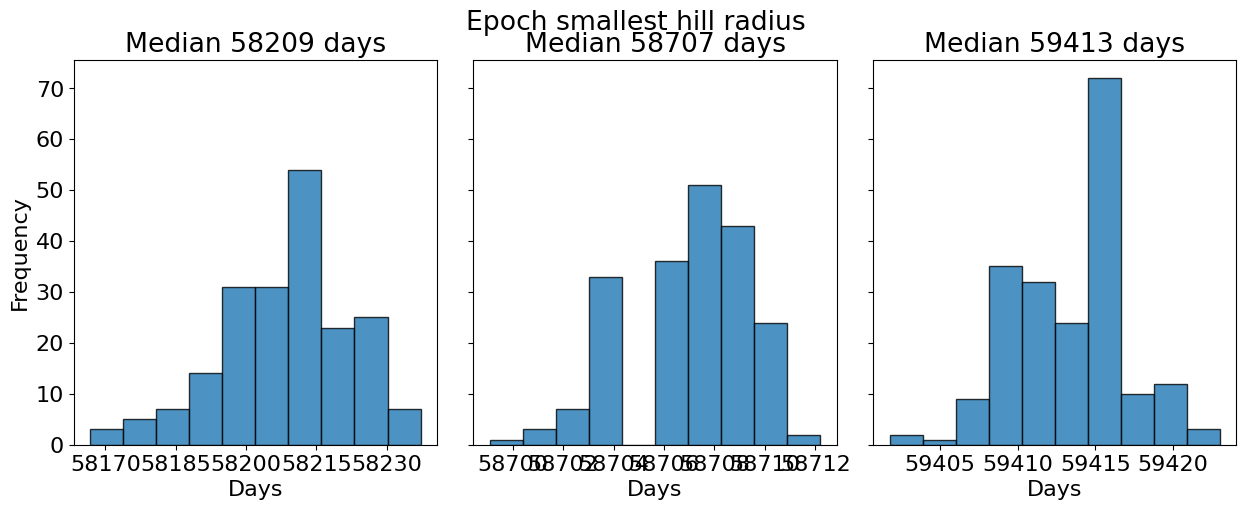

In [10]:
#plot transit dates 3 by 1 plot

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

Hill_epochs = []

mode_mjds_per_epoch = []
fig, axes = plt.subplots(1,3 , figsize=(15,5), sharex=False, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.2})
print('The median transits')
for i in np.arange(3):
    n, bins, patches =axes[i].hist(df.loc[df['n'] == i]['mjds'],  alpha=0.8,edgecolor='black')
    median_hist = int(np.median(df.loc[df['n'] == i]['mjds']))
    title = f'Median {median_hist } days'
    axes[i].set_title(title)
    mode_mjds = (bins[n.argmax()] + bins[n.argmax()+1])/2+np.median(df.loc[df['n'] == i]['mjds'])
    min = np.min(df.loc[df['n'] == i]['mjds'])
    max = np.max(df.loc[df['n'] == i]['mjds'])
    mode_mjds_per_epoch.append(mode_mjds)
    #print('std', np.std(df.loc[df['n'] == i]['mjds']))
    #print(f'For epoch {i} we get {mode_mjds :.2f} +{max-mode_mjds :.2f} -{mode_mjds-min :.2f} days')
    print(f'For epoch {i} we get {median_hist :.2f} +{np.max(bins)-median_hist :.2f} -{median_hist-np.min(bins) :.2f} days')
    #print(df.iloc[[(np.abs(df.loc[df['n'] == i]['mjds'] - mode_mjds)).argmin()]])
    axes[i].set_xlabel('Days')

    #print(np.array([np.max(bins), np.min(bins)])-median_hist, 'days offset from median')
axes[0].set_ylabel('Frequency')
axes[0].xaxis.set_major_locator(MultipleLocator(15))
axes[1].xaxis.set_major_locator(MultipleLocator(2))
fig.suptitle('Epoch smallest hill radius')
plt.savefig(f'Figures/orbital_bundels/orbitize_transit_day.pdf', bbox_inches='tight')
plt.show()

The mode transits
For epoch 0 we get 58210.81 +26.41 -44.02 days
For epoch 1 we get 58707.28 +4.91 -8.19 days
For epoch 2 we get 59415.04 +7.98 -13.31 days


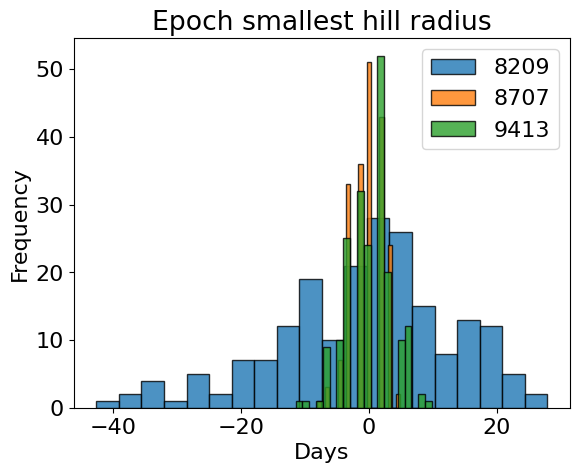

 pic b transits at 57800 mjds
dates transits approx:      11 April 2018,      21 August 2019,      27 July 2021,      27 June 2023?
[58210.805277525025, 58707.279344858965, 59415.036396724296]
mode 1204.2311191992703


In [11]:
#Combine and plot to see distribution better

Hill_epochs = []
#make mjds histogram 

mode_mjds_per_epoch = []
print('The mode transits')
for i in np.arange(3):
    n, bins, patches =plt.hist(df.loc[df['n'] == i]['mjds']-np.median(df.loc[df['n'] == i]['mjds']), bins = 20, alpha=0.8,edgecolor='black',label = int(np.median(df.loc[df['n'] == i]['mjds'])-57000+7000))
    mode_mjds = (bins[n.argmax()] + bins[n.argmax()+1])/2+np.median(df.loc[df['n'] == i]['mjds'])
    min = np.min(df.loc[df['n'] == i]['mjds'])
    max = np.max(df.loc[df['n'] == i]['mjds'])
    mode_mjds_per_epoch.append(mode_mjds)
    print(f'For epoch {i} we get {mode_mjds :.2f} +{max-mode_mjds :.2f} -{mode_mjds-min :.2f} days')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Epoch smallest hill radius')
plt.legend()
plt.show()


print(' pic b transits at 57800 mjds')
print("dates transits approx:      11 April 2018,      21 August 2019,      27 July 2021,      27 June 2023?" )
      

print(mode_mjds_per_epoch)
print('mode', mode_mjds_per_epoch[2]-mode_mjds_per_epoch[0]) #496, 707